## Uploading files
Since I am using Google Colab, I need to upload local files to Google Collaboratory

In [1]:
from google.colab import files
files.upload()

Saving test_image.pkl to test_image.pkl
Saving train_image.pkl to train_image.pkl
Saving train_label.pkl to train_label.pkl
Saving visualize.py to visualize.py


##  Import Libraries

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#Visualization
from visualize import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#To convert Y to one-hot-vector notation
from keras.utils import np_utils

#Used for CNN Model
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, ZeroPadding2D
from keras import optimizers

#Create training and testing data
from sklearn.model_selection import train_test_split

#To save the best model by avoiding overfitting
from keras.callbacks import ModelCheckpoint

#To write our output file
import csv

Using TensorFlow backend.


## Unpacking .pkl files

In [0]:
with open('train_image.pkl', 'rb') as f:
    X = pickle.load(f)

X = np.array(X)

In [4]:
print(type(X))
print(len(X))

<class 'numpy.ndarray'>
8000


In [0]:
#print(X[0])

In [0]:
with open('train_label.pkl', 'rb') as f:
    Y = pickle.load(f)

Y = np.array(Y)

In [7]:
print(len(Y))
print(np.unique(Y, return_counts=True))

8000
(array([0, 2, 3, 6]), array([2000, 2000, 2000, 2000]))


The above count shows that the data is perfectly balanced

### Since the labels are 0,2,3 and 6, we have to convert them to 0,1,2,3 so that they can be converted into one hot vectors to perform CNN

In [8]:
Y = np.ceil(np.divide(Y,2))
classes = np.unique(Y)
print(np.unique(Y, return_counts=True))

(array([0., 1., 2., 3.]), array([2000, 2000, 2000, 2000]))


In [0]:
#print(Y)

In [0]:
with open('test_image.pkl', 'rb') as f:
    XTest = pickle.load(f)

XTest = np.array(XTest)

In [11]:
print(len(XTest))

2000


In [12]:
print(X.shape, Y.shape)

(8000, 784) (8000,)


In [13]:
# Since CNN accepts input in the form of images therefore we reshape our training data
X = X.reshape((-1,28,28,1))   # '1' signifies that the image is a grayscale image
Y = np_utils.to_categorical(Y)  #convert Y to ohv

print(X.shape, Y.shape)

(8000, 28, 28, 1) (8000, 4)


## Visualizing Training Data

In [0]:
def drawImage(img):
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

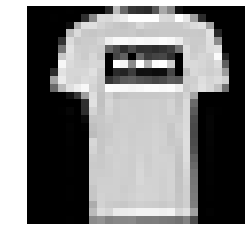

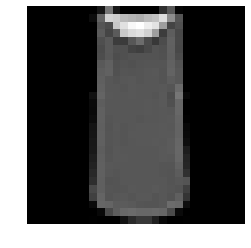

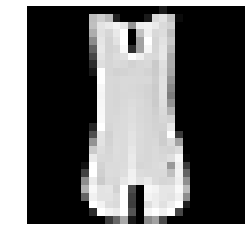

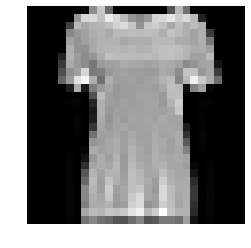

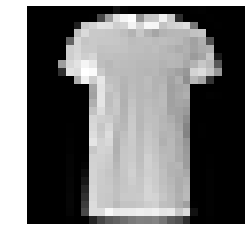

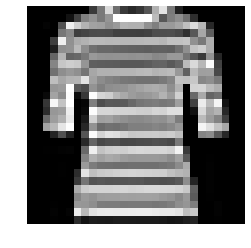

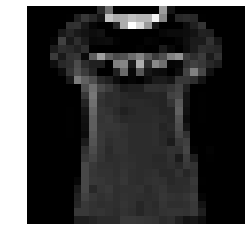

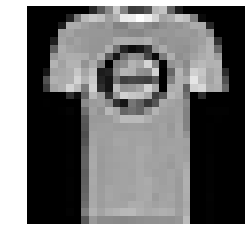

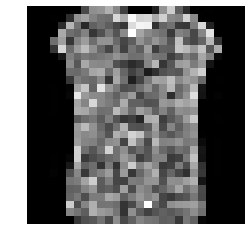

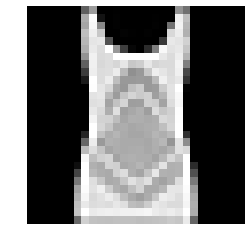

In [15]:
for i in range(10):
    drawImage(np.array(X[i]))

## Creating Training and Validation Data

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42, shuffle=True, stratify=Y)

In [17]:
print(type(X_train))
print(len(X_train))

<class 'numpy.ndarray'>
6800


In [0]:
#print(np.unique(X_train))

## Building a CNN Model

In [27]:
#A simple CNN model with basic layers
model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))  #Input size is provided only in the first layer
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))             #Used to prevent overfitting. Randomly turns off neurons in a layer with 0.25 probability
model.add(MaxPooling2D(2,2))         #Slides a (2,2) window over the input and stores maximum value of the window
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(Flatten())                 #Reshapes a 3D input to 1D output
model.add(Dense(4, activation='softmax'))     #(Fully connected layer) Connects every input to every output by a weight
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 51204     
Total para

In [0]:
## Optimizer
adam = optimizers.adam(lr=1e-4)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, Y_train, epochs=100, batch_size=256, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 6800 samples, validate on 1200 samples
Epoch 1/100
6800/6800 [==============================] - 6s 918us/step - loss: 4.7708 - acc: 0.4753 - val_loss: 1.6084 - val_acc: 0.6867
Epoch 2/100
6800/6800 [==============================] - 1s 161us/step - loss: 1.8432 - acc: 0.6900 - val_loss: 1.1577 - val_acc: 0.7392
Epoch 3/100
6800/6800 [==============================] - 1s 163us/step - loss: 1.2524 - acc: 0.7310 - val_loss: 0.8439 - val_acc: 0.7750
Epoch 4/100
6800/6800 [==============================] - 1s 162us/step - loss: 1.0547 - acc: 0.7471 - val_loss: 0.7267 - val_acc: 0.7992
Epoch 5/100
6800/6800 [==============================] - 1s 162us/step - loss: 0.9103 - acc: 0.7643 - val_loss: 0.6653 - val_acc: 0.7992
Epoch 6/100
6800/6800 [==============================] - 1s 163us/step - loss: 0.8281 - acc: 0.7791 - val_loss: 0.5877 - val_acc: 0.8083
Epoch 7/100
6800/6800 [==============================] - 1s 164us/step - loss: 0.7

### We see that the accuracy is still increasing after 100 epochs so we increase the number of epochs


In [30]:
hist = model.fit(X_train, Y_train, epochs=200, batch_size=256, validation_data=(X_test, Y_test))

Train on 6800 samples, validate on 1200 samples
Epoch 1/200
6800/6800 [==============================] - 2s 234us/step - loss: 3.0211 - acc: 0.5416 - val_loss: 1.2274 - val_acc: 0.6850
Epoch 2/200
6800/6800 [==============================] - 1s 164us/step - loss: 1.3506 - acc: 0.6921 - val_loss: 0.8520 - val_acc: 0.7358
Epoch 3/200
6800/6800 [==============================] - 1s 161us/step - loss: 1.0536 - acc: 0.7244 - val_loss: 0.7149 - val_acc: 0.7667
Epoch 4/200
6800/6800 [==============================] - 1s 164us/step - loss: 0.9224 - acc: 0.7474 - val_loss: 0.6440 - val_acc: 0.7892
Epoch 5/200
6800/6800 [==============================] - 1s 164us/step - loss: 0.8197 - acc: 0.7599 - val_loss: 0.6404 - val_acc: 0.7917
Epoch 6/200
6800/6800 [==============================] - 1s 162us/step - loss: 0.7678 - acc: 0.7785 - val_loss: 0.6108 - val_acc: 0.8050
Epoch 7/200
6800/6800 [==============================] - 1s 163us/step - loss: 0.7005 - acc: 0.7851 - val_loss: 0.5681 - val_acc: 

## Evaluation

In [31]:
score, accuracy = model.evaluate(X_test, Y_test)
print('Score: ', score.round(4))
print('Accuracy: ', accuracy.round(4)*100, '%')

1200/1200 [==============================] - 0s 139us/step
Score:  0.6245
Accuracy:  86.67 %


## Prediction

In [0]:
Y_pred_ohv = model.predict(X_test)
Y_pred = np.argmax(Y_pred_ohv, axis=1)  #Converting to appropriate labels

## Visualization

* **Accuracy and Loss Plots**

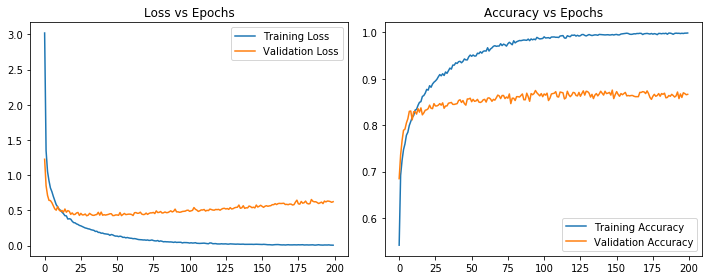

In [33]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Loss vs Epochs')
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy vs Epochs')
plt.plot(hist.history['acc'], label='Training Accuracy')
plt.plot(hist.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

* **Confusion Matrix**

Confusion matrix, without normalization
[[257   5   8  30]
 [  8 257   5  30]
 [  6   2 280  12]
 [ 28  16  10 246]]


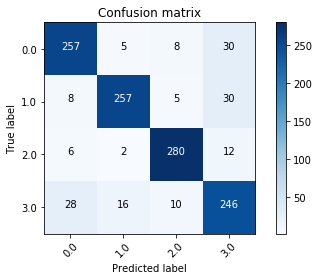

In [34]:
# Convert validation observations from one hot vectors to labels
Y_test_cnf = np.argmax(Y_test, axis=1)

#Plotting the confusion matrix
cnf_matrix = confusion_matrix(Y_test_cnf, Y_pred)
plot_confusion_matrix(cnf_matrix, classes=classes)

### We can further increase our accuracy by adding more layers
Since increasing the number of epochs didn't really help us with increasing accuracy, we make our model a little more complex and deep to be able to learn more details about the data. Hence, we add a few more layers.




In [44]:
model_improved = Sequential()
model_improved.add(BatchNormalization(input_shape=(28,28,1)))   #Normalizes the output of a previous activation layer
model_improved.add(Convolution2D(64, (4, 4), activation='relu'))
model_improved.add(MaxPooling2D(2, 2))
model_improved.add(Dropout(0.1))
    
# Convolution + Maxpooling
model_improved.add(Convolution2D(64, (4, 4), activation='relu'))
model_improved.add(MaxPooling2D(2, 2))

# Dropout
model_improved.add(Dropout(0.3))

# Converting 3D feature to 1D feature Vector
model_improved.add(Flatten())

# Fully Connected Layer
model_improved.add(Dense(256, activation='relu'))

# Dropout
model_improved.add(Dropout(0.5))
    
# Fully Connected Layer
model_improved.add(Dense(64, activation='relu'))
    
# Normalization
model_improved.add(BatchNormalization())

model_improved.add(Dense(4, activation='softmax'))

model_improved.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 64)          65600     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 64)          0         
__________

In [0]:
model_improved.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [37]:
hist_improved = model_improved.fit(X_train, Y_train, epochs=200, batch_size=256, validation_data=(X_test, Y_test))

Train on 6800 samples, validate on 1200 samples
Epoch 1/200
6800/6800 [==============================] - 2s 284us/step - loss: 1.2316 - acc: 0.4937 - val_loss: 0.7852 - val_acc: 0.6592
Epoch 2/200
6800/6800 [==============================] - 1s 108us/step - loss: 0.8519 - acc: 0.6303 - val_loss: 0.7000 - val_acc: 0.6908
Epoch 3/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.7553 - acc: 0.6651 - val_loss: 0.6802 - val_acc: 0.6667
Epoch 4/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.7008 - acc: 0.6916 - val_loss: 0.6703 - val_acc: 0.6933
Epoch 5/200
6800/6800 [==============================] - 1s 109us/step - loss: 0.6497 - acc: 0.7297 - val_loss: 0.6709 - val_acc: 0.6883
Epoch 6/200
6800/6800 [==============================] - 1s 109us/step - loss: 0.6062 - acc: 0.7468 - val_loss: 0.6317 - val_acc: 0.7242
Epoch 7/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.5820 - acc: 0.7610 - val_loss: 0.5833 - val_acc: 

## Evaluation

In [38]:
score, accuracy = model_improved.evaluate(X_test, Y_test)
print('Score: ', score.round(4))
print('Accuracy: ', accuracy.round(4)*100, '%')

1200/1200 [==============================] - 0s 118us/step
Score:  0.3973
Accuracy:  88.5 %


## Prediction

In [0]:
Y_pred_ohv = model_improved.predict(X_test)
Y_pred = np.argmax(Y_pred_ohv, axis=1)

## Visualization

* **Accuracy and Loss Plots**

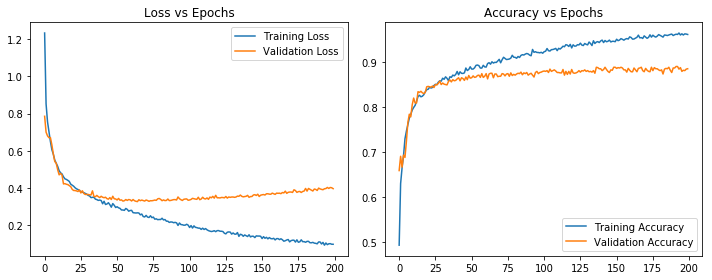

In [40]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Loss vs Epochs')
plt.plot(hist_improved.history['loss'], label='Training Loss')
plt.plot(hist_improved.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy vs Epochs')
plt.plot(hist_improved.history['acc'], label='Training Accuracy')
plt.plot(hist_improved.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### Here we observe that even though the training loss is continuously decreasing, the validation loss decreases upto a certain point and then starts increasing. This is due to the problem of overfitting.

* **Confusion Matrix**

Confusion matrix, without normalization
[[267   5   5  23]
 [  8 265   4  23]
 [  6   6 279   9]
 [ 22  17  10 251]]


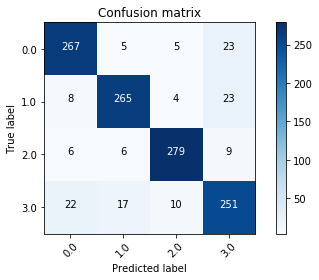

In [41]:
# Convert validation observations from one hot vectors to labels
Y_test_cnf = np.argmax(Y_test, axis=1)

#Plotting the confusion matrix
cnf_matrix = confusion_matrix(Y_test_cnf, Y_pred)
plot_confusion_matrix(cnf_matrix, classes=classes)

## Saving the trained model

In [0]:
model_improved.save('my_model.h5')

### Adding checkpoints so as to save the best model and overcome the problem of overfitting

Checkpoint saves the model after every epoch. Only those models are saved where the accuracy is more than that of the accuracy of previous epoch.

In [0]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [0]:
model_improved.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [46]:
hist_improved = model_improved.fit(X_train, Y_train, epochs=200, batch_size=256, validation_data=(X_test, Y_test), callbacks=[checkpoint])

Train on 6800 samples, validate on 1200 samples
Epoch 1/200
6800/6800 [==============================] - 2s 295us/step - loss: 1.1318 - acc: 0.5335 - val_loss: 0.7467 - val_acc: 0.6442
Epoch 2/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.7887 - acc: 0.6600 - val_loss: 0.6702 - val_acc: 0.6808
Epoch 3/200
6800/6800 [==============================] - 1s 109us/step - loss: 0.7160 - acc: 0.6956 - val_loss: 0.6049 - val_acc: 0.7258
Epoch 4/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.6451 - acc: 0.7210 - val_loss: 0.5740 - val_acc: 0.7558
Epoch 5/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.6065 - acc: 0.7490 - val_loss: 0.5418 - val_acc: 0.7842
Epoch 6/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.5657 - acc: 0.7724 - val_loss: 0.4953 - val_acc: 0.8108
Epoch 7/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.5397 - acc: 0.7788 - val_loss: 0.4895 - val_acc: 

### We have saved our best model.

## Evaluation

In [47]:
model_improved.evaluate(X_test, Y_test)

1200/1200 [==============================] - 0s 124us/step


[0.383438996647795, 0.8841666666666667]

In [48]:
model_improved.evaluate(X_train, Y_train)

6800/6800 [==============================] - 1s 107us/step


[0.016163252339260106, 0.9988235294117647]

In [0]:
#print(np.unique(XTest))

### Reshaping given test data for prediction

In [50]:
XTest = XTest.reshape((-1, 28, 28, 1))
print(XTest.shape)

(2000, 28, 28, 1)


## Writing the predicted outputs to a .csv file

In [51]:
count_0 = 0
count_2 = 0
count_3 = 0
count_6 = 0
predictions = []

with open('cheshta_kwatra.csv', 'w', newline='\n') as f:
  writer = csv.writer(f)
  writer.writerow(['image_index', 'class'])     #writing the first row
  
  for i in range(XTest.shape[0]):
    pred = model.predict_classes(XTest[i].reshape(1,28,28,1))
    if pred[0] == 0:
      count_0 += 1
      
    elif pred[0] == 1:
      pred[0] = 2        #changing to the original given labels
      count_2 += 1
      
    elif pred[0] == 2:
      pred[0] = 3
      count_3 += 1
      
    elif pred[0] == 3:
      pred[0] = 6
      count_6 += 1
    
    else:
      print(pred[0])
      print('--------')
      
    line = [i, pred[0]]
    writer.writerow(line)
    predictions.append(pred[0])
  
  print(len(predictions))

f.close()

2000


## Downloading the models and .csv files
Since I'm working on Google Colab, I need to download files generated on Google Colab onto my local computer

In [0]:
files.download('cheshta_kwatra.csv') 

In [0]:
files.download('my_model.h5') 

In [0]:
files.download('best_model.h5') 